# Grupo 3
### Bruno Dueñas, Fernando Mejía, Mateo Córdova

## Imports y labels globales

In [1]:
import numpy as np
import graphviz
from graphviz import Digraph
import pandas as pd
labels = ['Proteccion', 'Pelo', 'Altura', 'Peso', 'Quemadura']
clase = ['Quema', 'No quema']

## Data

In [2]:
quemadura_data = pd.read_csv("arbQuemadura.csv", index_col=0)
quemadura_data.head()

,Pelo,Altura,Peso,Proteccion,Quemadura
Ejemplo,,,,,
1,rubio,medio,bajo,no,si
2,rubio,alto,medio,si,no
3,moreno,bajo,medio,si,no
4,rubio,bajo,medio,no,si
5,rojo,medio,alto,no,si


## Data tratada

In [3]:
d = {'rubio': 2, 'moreno': 1, 'rojo': 0}
quemadura_data['Pelo'] = quemadura_data['Pelo'].map(d)
d = {'alto': 2, 'medio': 1, 'bajo': 0}
quemadura_data['Peso'] = quemadura_data['Peso'].map(d)
d = {'alto': 2, 'medio': 1, 'bajo': 0}
quemadura_data['Altura'] = quemadura_data['Altura'].map(d)
d = {'si': 1, 'no': 0}
quemadura_data['Proteccion'] = quemadura_data['Proteccion'].map(d)
quemadura_data['Quemadura'] = quemadura_data['Quemadura'].map(d)
quemadura_data

,Pelo,Altura,Peso,Proteccion,Quemadura
Ejemplo,,,,,
1,2,1,0,0,1
2,2,2,1,1,0
3,1,0,1,1,0
4,2,0,1,0,1
5,0,1,2,0,1
6,1,2,2,0,0
7,1,1,2,0,0
8,2,0,0,1,0


In [4]:
answers = quemadura_data['Quemadura']

### calcular la entropia

In [5]:
def calcular_entropia(p):
    return -np.sum(p*np.log2(p))

### calcular la ganancia

In [31]:
#calcular la ganancia
def calcular_ganancia(valores, var='Pelo'):
    valores, cuantos = np.unique(quemadura_data[var],return_counts=True)
    #genero una lista para calcular la ganancia
    info_A = []
    respuestas = [0, 0]
    indexes1 = []
    indexes0 = []
    for e in valores:
        se = np.where(quemadura_data[var]==e)
        #print("tiene se",se)
        #particiona por valor
        #indexes.append(quemadura_data.index[se[0]])
        se_quemadura = quemadura_data['Quemadura'][quemadura_data.index[se[0]]]
        
        #print("se_quemadura",se_quemadura)
        #valores por subgrupo
        v_se_quemadura, c_se_quemadura = np.unique(se_quemadura,return_counts=True)
        #print("subgrupos para {}: {} {}".format(e,v_se_quemadura,c_se_quemadura))
        #entropia del valor
        se_entropia = abs(calcular_entropia(c_se_quemadura/sum(c_se_quemadura)))
        #print("Entropia: ",se_entropia)
        #probabilidad del valor
        se_size = sum(c_se_quemadura)/len(quemadura_data.index)
        #print("probabilidad valor",se_size)
        #almacenar valores
        info_A += [[se_entropia, se_size]]
        #print("info_A",info_A)
    #convertir lista en arreglo
    info_A = np.array(info_A)
    #calcular la entropia de la variable
    info_g = np.sum(info_A[:,0]*info_A[:,1])
    #print("info_g",info_g)
    #print('respuestas>>>>', respuestas)
    return info_g

## get key

In [7]:
def get_key(val, dictionary):
    for key, value in dictionary.items():
        if val == value:
            return key

In [8]:
def splitNode(etiqueta, media):
    dictNode = {}
    cumple = []
    nocumple = []
    nocumple.append(np.where(quemadura_data[etiqueta] > media)[0])
    cumple.append(np.where(quemadura_data[etiqueta] <= media)[0])
    dictNode['cumple'] = cumple
    dictNode['nocumple'] = nocumple
    return dictNode

## Calcular la entropia del arbol

In [9]:
valores, cuantos = np.unique(quemadura_data['Quemadura'], return_counts=True)
entropia = calcular_entropia(cuantos/sum(cuantos))
print("Entropia del arbol",entropia)
valores,cuantos

Entropia del arbol 0.954434002924965


(array([0, 1], dtype=int64), array([5, 3], dtype=int64))

## Gráfico manual del árbol

***********Proteccion************
Valores: [0 1] Cuantos: [5 3]
media 0.5
[0 3 4 5 6] cumple entropia 0.97
Ejemplo
1    1
4    1
5    1
6    0
7    0
Name: Quemadura, dtype: int64
[1 2 7] nocumple entropia 0.0
ValoresNO: [0] CuantosNO: [3]
conectando n0 con n4
Ejemplo
1    1
4    1
5    1
6    0
7    0
Name: Quemadura, dtype: int64
***********Pelo************
Valores: [0] Cuantos: [3]
media 0.0
[4] cumple entropia 0.0
Ejemplo
5    1
Name: Quemadura, dtype: int64
[0 1 2 3 5 6 7] nocumple entropia 0.86
ValoresNO: [0 1] CuantosNO: [5 2]
conectando n4 con n8
Ejemplo
5    1
Name: Quemadura, dtype: int64
***********Altura************
Valores: [0 1] Cuantos: [5 2]
media 0.5
[2 3 7] cumple entropia 0.92
Ejemplo
3    0
4    1
8    0
Name: Quemadura, dtype: int64
[0 1 4 5 6] nocumple entropia 0.97
ValoresNO: [0 1] CuantosNO: [3 2]
conectando n8 con n12
Ejemplo
3    0
4    1
8    0
Name: Quemadura, dtype: int64
***********Peso************
Valores: [0 1] Cuantos: [3 2]
media 0.5
[0 7] cumple entro

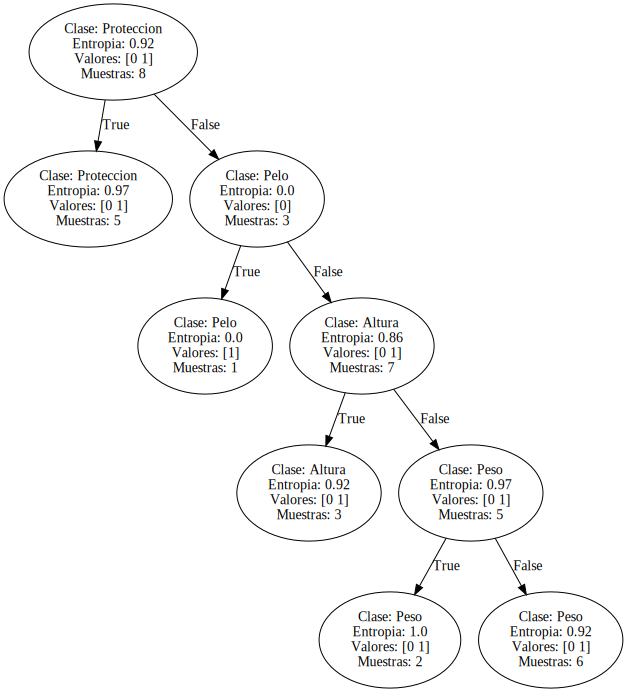

In [52]:
g = Digraph('grafo')
cont = 0
for lab in labels[0:4]:
    print('***********{}************'.format(lab))
    info_A = calcular_ganancia(valores, lab)
    ganancia = round(entropia - info_A, 2)
    if cont == 0:
        valores, cuantos = np.unique(quemadura_data['Quemadura'], return_counts=True)
    print('Valores: {} Cuantos: {}'.format(valores, cuantos))
    mean = sum(valores)/2
    print('media', mean)
    sn = splitNode(lab, mean)
    #print(sn)
    act = cont
    g.node("n{}".format(cont), label='Clase: {} \\n Entropia: {} \\n Valores: {} \\n Muestras: {}'.format(
            lab, round(entropia, 2), valores, sum(cuantos)
            ))
    for key, value in sn.items():
        valores, cuantos = np.unique(quemadura_data['Quemadura'][quemadura_data.index[tuple(value)]], return_counts=True)
        entropia = abs(round(calcular_entropia(cuantos/sum(cuantos)), 2))
        #print(valoresp, cuantosp)
        if entropia != 0:
            indicesNoCumple = value
        print('{} {} entropia {}'.format(str(value[0]), key, abs(entropia)))
        cont+=1
        if key == 'cumple':
            indicesCumple = value
            g.node("n{}".format(cont), label='Clase: {} \\n Entropia: {} \\n Valores: {} \\n Muestras: {}'.format(
            lab, round(entropia, 2), valores, sum(cuantos)
            ))
            g.edge('n{}'.format(str(act)), "n{}".format(cont), label='True')
        cont+=1
        if key == 'nocumple':
            print('ValoresNO: {} CuantosNO: {}'.format(valores, cuantos))
            g.node("n{}".format(cont), label='Clase: {} \\n Entropia: {} \\n Valores: {} \\n Muestras: {}'.format(
            lab, round(entropia, 2), valores, sum(cuantos)
            ))
            print('conectando n{} con n{}'.format(act, cont))
            g.edge('n{}'.format(str(act)), "n{}".format(cont), label='False') 
        print(quemadura_data['Quemadura'][quemadura_data.index[tuple(indicesCumple)]])
g

In [54]:
np.unique(quemadura_data[lab], return_counts=True)

(array([0, 1, 2], dtype=int64), array([2, 3, 3], dtype=int64))

In [53]:
quemadura_data['Quemadura'][quemadura_data.index[tuple(indicesCumple)]]

Ejemplo
1    1
8    0
Name: Quemadura, dtype: int64

## Gráfico con sklearn

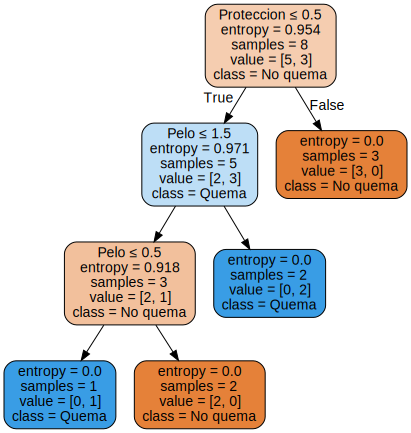

In [19]:
#utilizando la librería sklearn

from sklearn import tree
from sklearn import preprocessing

data = pd.DataFrame()
le = preprocessing.LabelEncoder()

for v in labels:
    le.fit(quemadura_data[v])
    data[v] = le.transform(quemadura_data[v])
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
t_data = data[data.columns[0:4]]
t_target = data[data.columns[4]]
clf = clf.fit(t_data, t_target)
t_data, t_target,clf
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=list(t_data.columns.values),
                         class_names=clase[::-1],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
valores, cuantos = np.unique(quemadura_data['Pelo'], return_counts=True)
print(valores)
sn = splitNode(valores, 'Pelo')
n0 = []
n1 = []
for key, value in sn.items():
    arr1 = np.where(quemadura_data['Quemadura'][quemadura_data.index[value]] == 0)[0]
    arr2 = np.where(quemadura_data['Quemadura'][quemadura_data.index[value]] == 1)[0]
    if len(arr1) != 0:
        n0.append((key, arr1))
    if len(arr2) != 0:
        n1.append((key, arr2))
n0, n1

In [ ]:
valores, cuantos = np.unique(quemadura_data['Pelo'], return_counts=True)
print(valores)
sn = splitNode(valores, 'Pelo')
n0 = []
n1 = []
for key, value in sn.items():
    print('**********',key,'*********')
    arr1 = np.where(quemadura_data['Quemadura'][quemadura_data.index[value]] == 0)[0]
    v_se_quemadura, c_se_quemadura = np.unique(arr1,return_counts=True)
    print('no>', v_se_quemadura, c_se_quemadura)
    arr2 = np.where(quemadura_data['Quemadura'][quemadura_data.index[value]] == 1)[0]
    v_se_quemadura, c_se_quemadura = np.unique(arr2,return_counts=True)
    print('si>', v_se_quemadura, c_se_quemadura)
    if len(arr1) != 0:
        n0.append((key, arr1))
    if len(arr2) != 0:
        n1.append((key, arr2))
n0, n1

In [ ]:
 print(quemadura_data['Quemadura'][1])